In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import glob
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#/home/mremington/Documents/therma_sim/ibutton_data_analysis/
otm_canada_fp = 'data/OTM_Data/Canada/OTM_Data_Canada_2022/Air_Temp_CAN_2022.csv'
col_names = ['Date', 'Unit', 'Temperature']
otm_canada = pd.read_csv(otm_canada_fp,names = col_names, skiprows=20, header=None)
otm_canada['Date'] = pd.to_datetime(otm_canada['Date']) 
otm_canada['year'] = otm_canada['Date'].dt.year
otm_canada['month'] = otm_canada['Date'].dt.month
otm_canada['day'] = otm_canada['Date'].dt.day
otm_canada['hour'] = otm_canada['Date'].dt.hour
otm_canada['minute'] = otm_canada['Date'].dt.minute

#otm_canada.head()

<ipython-input-2-a4d178746439>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  otm_canada['Date'] = pd.to_datetime(otm_canada['Date'])


[Text(0, 0.5, 'Air Temp (C)')]

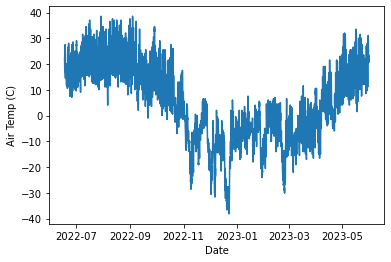

In [3]:
sns.lineplot(data=otm_canada, x = "Date",y = "Temperature").set(ylabel = "Air Temp (C)")

In [10]:
def get_study_site(fp):
    study_site = fp.split('/')[0]
    return study_site

def get_otm(fp):
    csv_name = fp.split('/')[-1]
    otm_name = csv_name.split('_')[0]
    if otm_name == 'AirtempNE22':
        otm_name = 'Air Temperature'
    elif otm_name == 'Air':
        otm_name = 'Air Temperature'
    elif otm_name == 'OTM':
        otm_name = otm_name + csv_name.split('_')[1]
    return otm_name

def get_csv_file_name(fp):
    return fp.split('/')[-1]
    
#print(get_study_site(fp = otm_canada_fp))

In [7]:
base_folder = '/home/mremington/Documents/therma_sim/therma_sim/Data/Thermal_Ecology_Viridis/OTM_Data/'
data_folders = ['Canada/OTM_Data_Canada_2022/',
                'Canada/OTM_Data_Canada_2023/',
                'Texas/Marathon/OTM_DATA_MG_2021/',
                'Texas/Marathon/OTM_Offload_day_07302021/',
                'Texas/Marathon/OTM_Data_Texas_23_24/',
                'Nebraska/OTM_Data_Nebraska_22_23/',
                'Nebraska/OTM_Data_Nebraska_23_24/'
               ]

In [11]:
otm_main = pd.DataFrame()
for folder in data_folders:
    csv_files = glob.glob(base_folder + folder + "*.csv")
    for csv_file in csv_files:
        col_names = ['Date', 'Unit', 'Temperature']
        temp_df = pd.read_csv(csv_file,names = col_names, skiprows=20, header=None)
        temp_df['Date'] = pd.to_datetime(temp_df['Date']) 
        temp_df['year'] = temp_df['Date'].dt.year
        temp_df['month'] = temp_df['Date'].dt.month
        temp_df['day'] = temp_df['Date'].dt.day
        temp_df['hour'] = temp_df['Date'].dt.hour
        temp_df['minute'] = temp_df['Date'].dt.minute
        temp_df['Study_Site'] = [get_study_site(folder) for i in range(len(temp_df))]
        temp_df['OTM_ID'] = [get_otm(csv_file) for i in range(len(temp_df))]
        temp_df['file_name'] = [get_csv_file_name(csv_file) for i in range(len(temp_df))]
        otm_main = pd.concat([otm_main, temp_df], ignore_index=True)

In [12]:
otm_main.head()

,Date,Unit,Temperature,year,month,day,hour,minute,Study_Site,OTM_ID,file_name
0,2022-06-17 23:00:01,C,17.663,2022,6,17,23,0,Canada,OTM8,OTM8_burrow_CAN_2022.csv
1,2022-06-18 00:10:01,C,17.663,2022,6,18,0,10,Canada,OTM8,OTM8_burrow_CAN_2022.csv
2,2022-06-18 01:20:01,C,17.163,2022,6,18,1,20,Canada,OTM8,OTM8_burrow_CAN_2022.csv
3,2022-06-18 02:30:01,C,17.163,2022,6,18,2,30,Canada,OTM8,OTM8_burrow_CAN_2022.csv
4,2022-06-18 03:40:01,C,16.662,2022,6,18,3,40,Canada,OTM8,OTM8_burrow_CAN_2022.csv


In [10]:
len(otm_main)

387482

In [13]:
#print(np.unique(otm_main['otm_name']))
print(np.unique(otm_main['Study_Site']))

['Canada' 'Nebraska' 'Texas']


In [21]:

master_sheets = ['Canada/OTM_Master_CA_22.xlsx',
                 'Nebraska/Master_OTM_List_Nebraska.xlsx',
                 'Texas/Marathon/OTM_Master_TX.xlsx']

In [32]:
# temp_md = pd.read_excel(master_sheets[3])
# temp_md = temp_md[["OTM ID", "Lat ", "Long", "Microhabitat"]]
# temp_md['Study_Site'] = [get_study_site(master_sheets[0]) for i in range(len(temp_md))]
# temp_md.head()

In [22]:
meta_data = pd.DataFrame()

In [23]:
# Canada master sheet
can_md = pd.read_excel(base_folder+master_sheets[0])
can_md = can_md[["OTM ID", "Lat ", "Long", "Microhabitat"]]
can_md.columns = ['OTM_ID', 'Lat', 'Long', 'Microhabitat']
can_md['Study_Site'] = [get_study_site(master_sheets[0]) for i in range(len(can_md))]
meta_data = pd.concat([meta_data, can_md], ignore_index=True)
meta_data.head()
#can_md.head()

,OTM_ID,Lat,Long,Microhabitat,Study_Site
0,OTM1,50.849325,-110.051502,Open,Canada
1,OTM2,50.849341,-110.051723,Shrub,Canada
2,OTM3,50.849241,-110.051921,Shrub,Canada
3,OTM4,50.849180,-110.051854,Open,Canada
4,OTM5,50.849140,-110.051803,Shrub,Canada


In [25]:
# Nebraska master sheet
neb_md = pd.read_excel(base_folder+master_sheets[1])
neb_md = neb_md[["OTM Number", "Latitude ", "Longitude", "Habitat"]]
neb_md.columns = ['OTM_ID', 'Lat', 'Long', 'Microhabitat']
neb_md['Study_Site'] = [get_study_site(master_sheets[1]) for i in range(len(neb_md))]
meta_data = pd.concat([meta_data, neb_md], ignore_index=True)
neb_md.head()

,OTM_ID,Lat,Long,Microhabitat,Study_Site
0,1,42.798423,-100.127813,Open,Nebraska
1,2,42.798303,-100.128142,Burrow/Half Burrow?,Nebraska
2,3,42.798403,-100.128113,Half Burrow,Nebraska
3,4,42.798231,-100.128478,Open,Nebraska
4,5,42.798156,-100.128762,Burrow/Half Burrow?,Nebraska


In [18]:
otm_main[otm_main['Study_Site']=='Nebraska']['OTM_ID'].unique()

array(['OTM9', 'Air Temperature', 'OTM3', 'OTM10', 'OTM1', 'OTM11',
       'OTM4', 'OTM7'], dtype=object)

In [26]:
neb_md['OTM_ID'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
       'Air Temperature '], dtype=object)

In [27]:
# Texas Marathon master sheet
mar_md = pd.read_excel(base_folder+master_sheets[2])
mar_md = mar_md[["OTM ID", "Lat ", "Long", 'Microhabitat']]
mar_md.columns = ['OTM_ID', 'Lat', 'Long', 'Microhabitat']
mar_md['Study_Site'] = [get_study_site(master_sheets[2]) for i in range(len(mar_md))]
meta_data = pd.concat([meta_data, mar_md], ignore_index=True)

In [25]:
# Texas Monohans master sheet
mon_md = pd.read_excel(master_sheets[3])
mon_md = mon_md[["OTM Number", "Latitude ", "Longitude", "Habitat"]]
mon_md.columns = ['OTM_ID', 'Lat', 'Long', 'Microhabitat']
mon_md['Study_Site'] = [get_study_site(master_sheets[3]) for i in range(len(mon_md))]
meta_data = pd.concat([meta_data, mon_md], ignore_index=True)
mon_md.head()

,OTM_ID,Lat,Long,Microhabitat,Study_Site
0,OTM1,NaN,NaN,shrub,Texas-Monohans
1,OTM2,NaN,NaN,open,Texas-Monohans
2,OTM3,NaN,NaN,open,Texas-Monohans
3,OTM4,NaN,NaN,shrub,Texas-Monohans
4,OTM5,NaN,NaN,open,Texas-Monohans


In [12]:
meta_data[meta_data['Study_Site']=='Texas-Marathon'].head()

,OTM_ID,Lat,Long,Microhabitat,Study_Site
31,OTM1,30.322706,-103.136333,Open,Texas-Marathon
32,OTM2,30.322286,-103.136194,Bush,Texas-Marathon
33,OTM3,30.322069,-103.136363,Bush,Texas-Marathon
34,OTM4,30.321748,-103.136402,Open,Texas-Marathon
35,OTM5,30.321449,-103.136447,Grass,Texas-Marathon


In [32]:
main_data = otm_main.merge(meta_data, on=['Study_Site', 'OTM_ID'], how='left')

In [28]:
main_data[(main_data['Study_Site'] == 'Texas-Marathon') & (main_data['Microhabitat'] == 'Burrow')].head()

NameError: name 'main_data' is not defined

In [29]:
len(main_data)

404357

In [43]:
# Before
#main_data.groupby('Study_Site')['Lat'].unique()
#main_data['Study_Site'].unique()
main_data['Lat'] = main_data.groupby('Study_Site')['Lat'].apply(lambda x: x.fillna(x.mean()))
main_data['Long'] = main_data.groupby('Study_Site')['Long'].apply(lambda x: x.fillna(x.mean()))
#main_data.groupby('Study_Site')['Lat'].unique()

In [33]:
# if otm_id = air temp in top one
def Microhabitat_formatter(microhabitat, otm_ID):
    try:
        micro = microhabitat.capitalize()
        if micro in ['Half Burrow', 'Burrow Entrance', 'Half burrow', 'Half burrow', 'Burrow entrance']:
            micro='Burrow'
        elif micro in ['Bush', 'Bush ']:
            micro='Shrub'
        elif micro in ['Grass', 'Hanging from tree', 'Tree']:
            micro='Open'
    except AttributeError:
        if otm_ID=='Air Temperature':
            micro='Air'
        else:
            micro=None
    return micro
    
main_data['Microhabitat'] = [Microhabitat_formatter(microhabitat=row['Microhabitat'],otm_ID = row['OTM_ID'] ) for index, row in main_data.iterrows()]       


main_data['Microhabitat'].unique()

array(['Burrow', 'Air', 'Open', 'Half burow', None, 'Shrub'], dtype=object)

In [7]:
def season_of_date(date):
    year = str(date.year)

    # Extract a string of only the date of the DateTime column, use that in the if statements.
    date_only = str(date.date())

    # Changed the format of the date_range from DD-MM-YYYY to YYYY-MM-DD.
    seasons = {'Spring': pd.date_range(start=year+'/03/21', end=year+'/06/20'),
               'Summer': pd.date_range(start=year+'/06/21', end=year+'/09/22'),
               'Autumn': pd.date_range(start=year+'/09/23', end=year+'/12/20')}
    if date_only in seasons['Spring']:
        return 'Spring'
    if date_only in seasons['Summer']:
        return 'Summer'
    if date_only in seasons['Autumn']:
        return 'Autumn'
    else:
        return 'Winter'
    
    
main_data['season'] = [season_of_date(row['Date']) for index, row in main_data.iterrows()]    
#airtemp_df['season'] = [season_of_date(row['Date']) for index, row in airtemp_df.iterrows()]


NameError: name 'main_data' is not defined

In [34]:
main_data.to_csv('OTM_Main_Database_02222025.csv')

In [59]:
#sns.lineplot(data=main_data, x = "Date",y = "Temperature", hue = 'Study_Site').set(ylabel = "Air Temp (C)")
# sns.relplot(
#     data=main_data, x = "Date",y = "Temperature", 
#     col="Study_Site", style = 'Microhabitat', kind="line"
# )

In [42]:
#### Snake Data
base_folder= '/home/mremington/Documents/therma_sim/therma_sim/Data/Thermal_Ecology_Viridis/Snake_iButton_Data/'
sn_data_folders = ['Canada/',
                   'Texas/Marathon/Texas_21-22/',
                   'Texas/Marathon/Texas_23-24/',
                   'Nebraska/'
               ]

def get_snake_name(csv_file):
    partial_name = get_otm(csv_file)
    name = partial_name.split('(')[0]
    return name

In [43]:
snake_main = pd.DataFrame()
for folder in sn_data_folders:
    csv_files = glob.glob(base_folder + folder + "*.csv")
    for csv_file in csv_files:
        col_names = ['Date', 'Unit', 'Temperature']
        temp_df = pd.read_csv(csv_file,names = col_names, skiprows=20, header=None)
        temp_df['Date'] = pd.to_datetime(temp_df['Date']) 
        temp_df['year'] = temp_df['Date'].dt.year
        temp_df['month'] = temp_df['Date'].dt.month
        temp_df['day'] = temp_df['Date'].dt.day
        temp_df['hour'] = temp_df['Date'].dt.hour
        temp_df['minute'] = temp_df['Date'].dt.minute
        temp_df['Study_Site'] = [get_study_site(folder) for i in range(len(temp_df))]
        temp_df['Snake_Name'] = [get_snake_name(csv_file) for i in range(len(temp_df))]
        temp_df['file_name'] = [get_csv_file_name(csv_file) for i in range(len(temp_df))]
        snake_main = concatenated_df = pd.concat([snake_main, temp_df])

In [44]:
snake_main.head()

,Date,Unit,Temperature,year,month,day,hour,minute,Study_Site,Snake_Name,file_name
0,2022-06-17 23:00:01,C,21.071,2022,6,17,23,0,Canada,Moose,Moose(EDCRVI006)2022_2023.csv
1,2022-06-18 00:10:01,C,21.071,2022,6,18,0,10,Canada,Moose,Moose(EDCRVI006)2022_2023.csv
2,2022-06-18 01:20:01,C,20.571,2022,6,18,1,20,Canada,Moose,Moose(EDCRVI006)2022_2023.csv
3,2022-06-18 02:30:01,C,20.571,2022,6,18,2,30,Canada,Moose,Moose(EDCRVI006)2022_2023.csv
4,2022-06-18 03:40:01,C,20.571,2022,6,18,3,40,Canada,Moose,Moose(EDCRVI006)2022_2023.csv


In [45]:
unique_combinations = snake_main[['Study_Site', 'Snake_Name']].drop_duplicates()
print(unique_combinations)

  Study_Site Snake_Name
0     Canada      Moose
0     Canada      Olive
0     Canada     Hector
0     Canada    Chinook
0     Canada     Albert
0     Canada   Manitoba
0     Canada     Hunter
0     Canada    Kokanee
0     Canada     Cooper
0     Canada     Victor
0     Canada     Paloma
0     Canada      Eddie
0     Canada       Chad
0      Texas      Janis
0      Texas   Cladwell
0      Texas       Cher
0      Texas      Nando
0      Texas      Dusty
0      Texas    Cecilia
0      Texas     Bonnie
0      Texas    Tornado
0      Texas     Caezar
0      Texas      Ringo
0      Texas    Brisket
0      Texas     Merlin
0      Texas   Deadwood
0      Texas     Willow
0      Texas     Sedona
0      Texas       Mort
0      Texas      Bryan
0      Texas      Hazel
0   Nebraska      Bjorn
0   Nebraska     Horace
0   Nebraska     Ragnar


In [18]:
len(snake_main)
snake_main['Study_Site'].unique()

array(['Canada', 'Texas-Marathon', 'Nebraska'], dtype=object)

In [6]:
snake_main['season'] = [season_of_date(row['Date']) for index, row in snake_main.iterrows()]  

NameError: name 'season_of_date' is not defined

In [46]:
snake_main.to_csv('Data/snake_thermal_database_02222025.csv')